# EXPLORATORY DATA ANALYSIS ON SALARY DATA
SOURCE : KAGGLE


In [5]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

#### OVERVIEW OF DATA

In [6]:
df = pd.read_csv(r"C:\Users\USER\Documents\SDSU\Personal\CLASSIFICATION\ds_salaries.csv")
print("DATASET OVERVIEW:")
df.head(5)

DATASET OVERVIEW:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
print(f"number of rows = {df.shape[0]} and number of columns = {df.shape[1]}")

number of rows = 607 and number of columns = 12


In [8]:
#dropping unnamed column
df=df.drop("Unnamed: 0",axis=1)

#### DATA EXPLORATION

In [9]:
#Understanding contents of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


###### INFERENCE:

>There are *_11 features_* and *_607 observations_* with no null values. There are 4 columns with _numerical data_ and 7 columns with _categorical data_.

##### NUMERIC VARIABLES

In [10]:
#basic statistics of the four numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


###### INFERENCE:

>We can see that *work_year* ranges from _2020_ to _2022_.
The _standard deviation_ for *salary* is very high. However, it has a lower value when considered in usd - *salary_in_usd*.

##### CATEGORICAL VARIABLES

In [11]:
#basis statistics for categorical variables
df.describe(include=['object']).T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [12]:
for i in df.columns:
    if (df[i].dtypes =='O') and (len(df[i].unique()) > 10):
        print(f"There are {len(df[i].unique())} categories in '{i}'" )

There are 50 categories in 'job_title'
There are 17 categories in 'salary_currency'
There are 57 categories in 'employee_residence'
There are 50 categories in 'company_location'


###### INFERENCE:

>In the recorded data more than one country uses the same currency for their salary.
Number of countries of _'employee_residence'_ is greater than _'company_location'_ which can be an indicator of remote work or immigration.

In [13]:
#determining the distribution of the categorical variables
for i in df.columns:
    if (df[i].dtypes =='O') and (len(df[i].unique()) <+ 10):
        print(f"The variable '{i}' has the following category and distribution:\n",df[i].value_counts())
        print('\n')

The variable 'experience_level' has the following category and distribution:
 experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64


The variable 'employment_type' has the following category and distribution:
 employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


The variable 'company_size' has the following category and distribution:
 company_size
M    326
L    198
S     83
Name: count, dtype: int64




#### DISTRIBUTION OF EMPLOYEES BY EXPERIENCE AND TYPE OF WORK


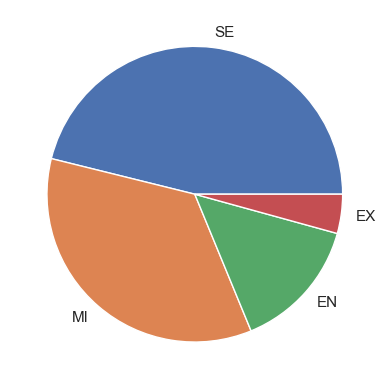

In [187]:
p1=pd.DataFrame(df['experience_level'].value_counts()).reset_index()
plt.pie(p1['count'],labels=p1['experience_level'])
plt.show()

#### INFERENCE:
>Majority of the given data consists **SE** : SENIOR and MI: MID level employes follwed by **EN**: ENTRY level.

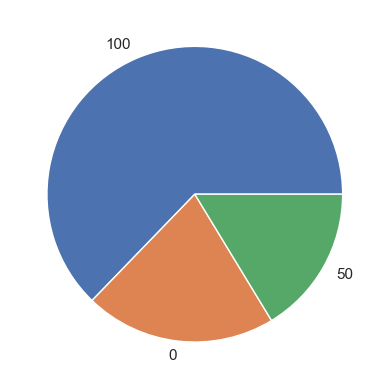

In [186]:
p1=pd.DataFrame(df['remote_ratio'].value_counts()).reset_index()
plt.pie(p1['count'],labels=p1['remote_ratio'])
plt.show()

#### INFERENCE:
>Majority of obseravtions ahve **100**: 100% remote jobs while the rest of the population is almost equally distributed btween **0** : no remote work and **50** : hybrid.

#### DISTIBUTION OF SALARY

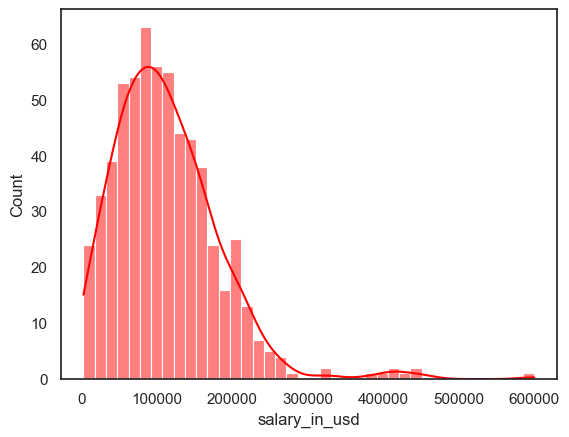

In [188]:
sns.histplot(data = df, x = 'salary_in_usd',bins=40, color='red', kde = True)
plt.show()

#### INFERENCE:
>The salary data is right skewed and bi-modal having a central tendency around 100k

#### EXPLORING 'salary_currency' :

In [14]:
#determing which 'company_location' uses the same 'salary_currency'

chck1=df[['company_location', 'salary_currency']].drop_duplicates(subset=['company_location', 'salary_currency'], keep='last').sort_values(by='company_location')
chck1

,company_location,salary_currency
481,AE,USD
244,AS,INR
507,AT,EUR
505,AU,AUD
510,AU,USD
...,...,...
182,US,EUR
102,US,HUF
455,US,CNY
606,US,USD


###### INFERENCE:
> There are 73 columns in this table while 'company_location' has only 50 unique values. This shows that that countries with one company location uses more than one 'salary_currency". For example, we see 'AU' using 'AUD' as well as 'USD' while 'US' can be seen using 4 diffrent currency.

In [15]:
#creating a table to understand the relation between company location and salary currency

chck1_1=chck1.groupby(['company_location'])['salary_currency'].apply(','.join).reset_index()
chck1_1

,company_location,salary_currency
0,AE,USD
1,AS,INR
2,AT,EUR
3,AU,"AUD,USD"
4,BE,EUR
5,BR,"BRL,USD"
6,CA,"CAD,USD"
7,CH,"INR,CHF"
8,CL,CLP
9,CN,"USD,CNY"


###### INFERENCE:
> The above table shows the 'salary_currency' used in different 'company_locations'.

In [16]:
#creating a list if company locations that use multiple currencies.

chck1_1[chck1_1['salary_currency'].str.contains(',')].reset_index().drop('index',axis=1)

,company_location,salary_currency
0,AU,"AUD,USD"
1,BR,"BRL,USD"
2,CA,"CAD,USD"
3,CH,"INR,CHF"
4,CN,"USD,CNY"
5,CZ,"EUR,USD"
6,DE,"EUR,USD"
7,DK,"DKK,EUR"
8,ES,"EUR,USD"
9,FR,"USD,EUR"


###### INFERENCE:
> There are 19 'company_location' which uses more than one 'salary_currency'.	

##### QUESTION: WHICH CURRENCY IS BEING USED THE MOST FOR SALARY?

In [17]:
#frequecny distribution of 'salary_currency' wrt #employees

df2 = pd.DataFrame(df.groupby(['salary_currency'])['company_location'].count()).reset_index()
df2 = df2.rename(columns={'company_location': 'count'})
df2_2=df2.sort_values(by=['count'],ascending = False).head(10)
print(f"Frequency Distribution of use of salary currency given the total number of employees: \n{df2_2.reset_index().drop('index',axis=1)}")

Frequency Distribution of use of salary currency given the total number of employees: 
  salary_currency  count
0             USD    398
1             EUR     95
2             GBP     44
3             INR     27
4             CAD     18
5             JPY      3
6             PLN      3
7             TRY      3
8             CNY      2
9             DKK      2


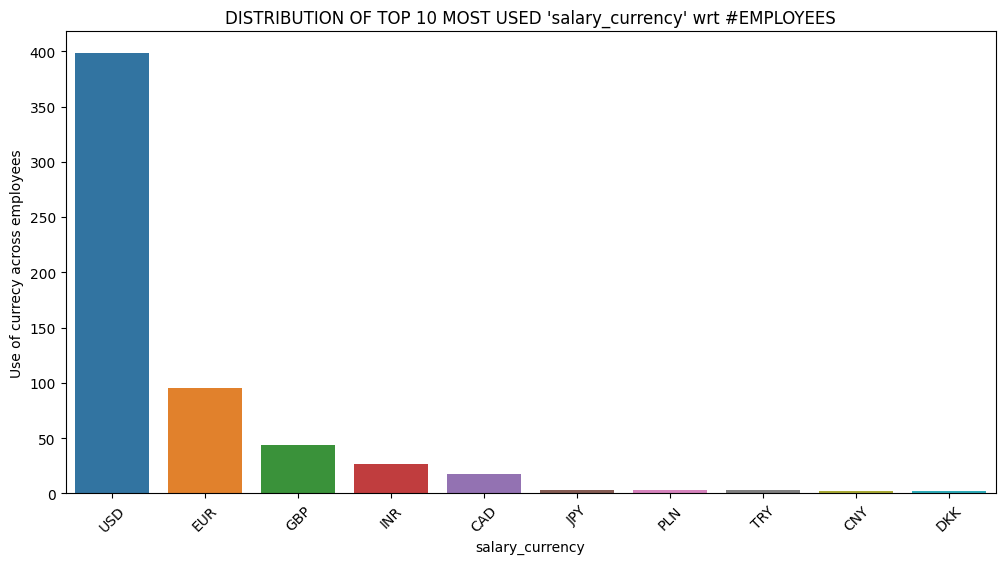

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_currency', y='count', data=df2_2)
plt.xticks(rotation=45)
plt.title("DISTRIBUTION OF TOP 10 MOST USED 'salary_currency' wrt #EMPLOYEES")
plt.xlabel('salary_currency')
plt.ylabel('Use of currecy across employees')
plt.show()

Frequency Distribution of use of salary currency given the total number of employees: 
  salary_currency  salary_in_usd
0             USD       54631386
1             EUR        6246390
2             GBP        3593523
3             CAD        1750012
4             INR         749670
5             SGD         208353
6             JPY         182764
7             AUD         174128
8             CHF         122346
9             PLN         110663


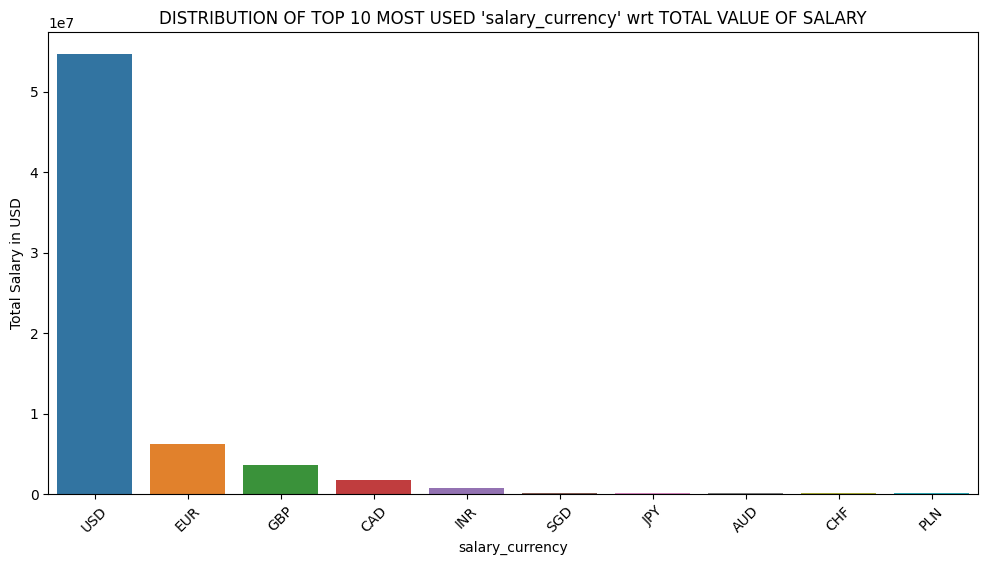

In [19]:
#frequecny distribution of 'salary_currency' wrt Salaries in USD

df3 = pd.DataFrame(df.groupby(['salary_currency'])['salary_in_usd'].sum()).reset_index()
#df3 = df3.rename(columns={'company_location': 'count'})
df3_1=df3.sort_values(by=['salary_in_usd'],ascending = False).head(10)
print(f"Frequency Distribution of use of salary currency given the total number of employees: \n{df3_1.reset_index().drop('index',axis=1)}")
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_currency', y='salary_in_usd', data=df3_1)
plt.xticks(rotation=45)
plt.title("DISTRIBUTION OF TOP 10 MOST USED 'salary_currency' wrt TOTAL VALUE OF SALARY")
plt.xlabel('salary_currency')
plt.ylabel('Total Salary in USD')
plt.show()

##### INFERENCE:
> Comparing the two plots we see that INR which ranks 4th as the most used salary currency, moves down to 5th when compared on the basis of values in USD where it switches psotion with CAD. All currency rank ordering changes after the 5th position when comparing values and numbers.

In [20]:
#determing the curreny distribution wrt its use in other countries
df4 = pd.DataFrame(df.groupby(['salary_currency'])['company_location'].nunique()).reset_index()
df4 = df4.rename(columns={'company_location': 'count'})
df4_2=df4.sort_values(by=['count'],ascending = False).head(5)
print(f"Frequency Distribution of use of salary currency given the total number of coutries used in: \n{df4_2.reset_index().drop('index',axis=1)}")

Frequency Distribution of use of salary currency given the total number of coutries used in: 
  salary_currency  count
0             USD     32
1             EUR     20
2             INR      4
3             SGD      2
4             CNY      2


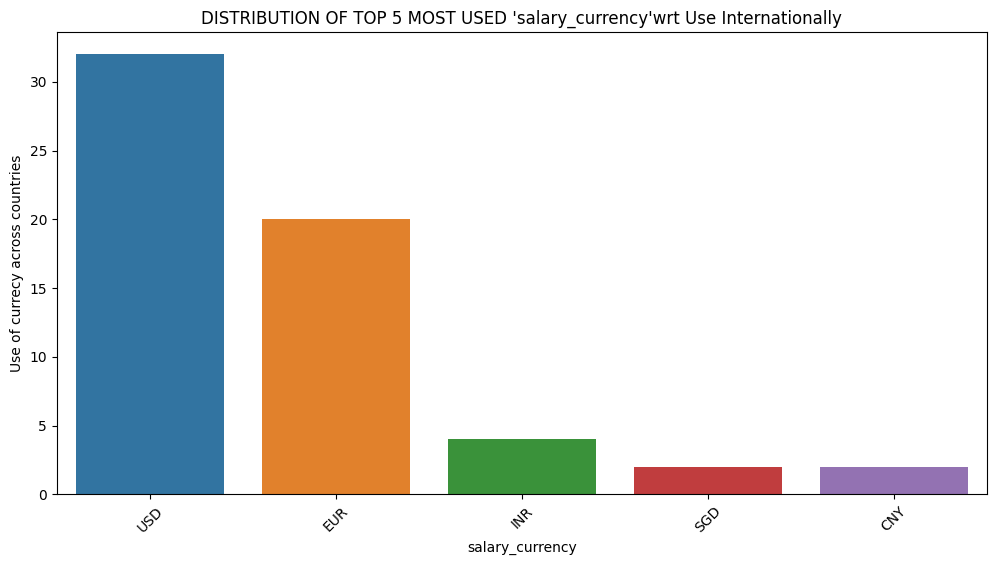

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_currency', y='count', data=df4_2)
plt.xticks(rotation=45)
plt.title("DISTRIBUTION OF TOP 5 MOST USED 'salary_currency'wrt Use Internationally")
plt.xlabel('salary_currency')
plt.ylabel('Use of currecy across countries')
plt.show()

#### EMPLOYMENT TYPE

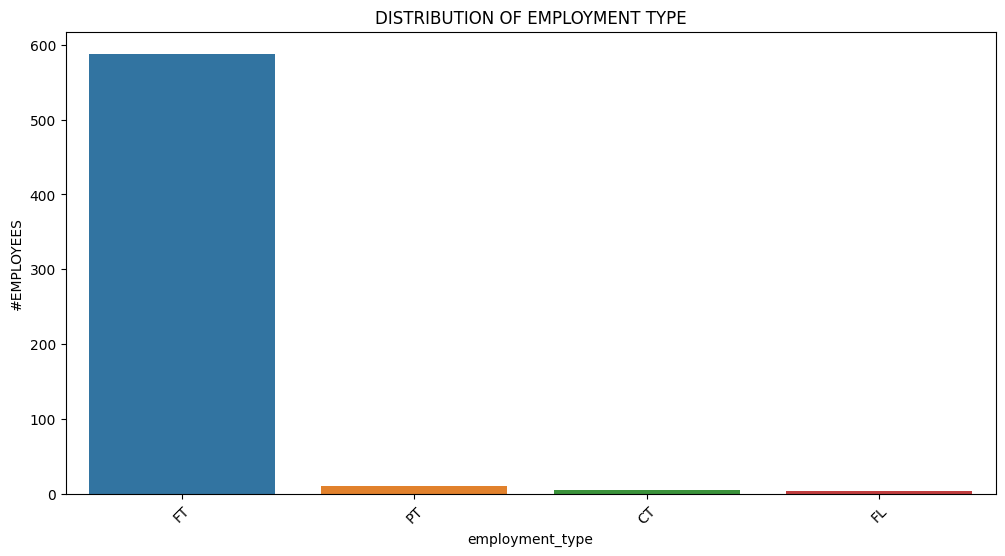

In [22]:
#frequency distribution of employee count by job type
df7 = pd.DataFrame(df['employment_type'].value_counts()).reset_index()
df7 = df7.rename(columns={'company_location': 'count'})
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='count', data=df7)
plt.xticks(rotation=45)
plt.title("DISTRIBUTION OF EMPLOYMENT TYPE")
plt.ylabel('#EMPLOYEES')
plt.show()

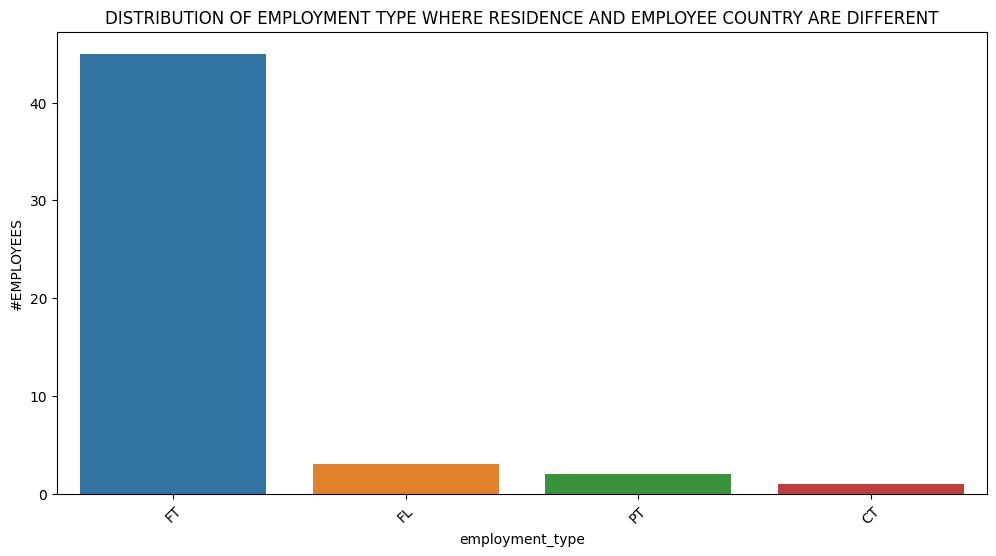

In [23]:
#distribution of employment type where 'employee_residence' and 'company_location' are different

df8=df[df['employee_residence'] != df['company_location']]
df8_1 = pd.DataFrame(df8['employment_type'].value_counts()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='count', data=df8_1)
plt.xticks(rotation=45)
plt.title("DISTRIBUTION OF EMPLOYMENT TYPE WHERE RESIDENCE AND EMPLOYEE COUNTRY ARE DIFFERENT")
plt.ylabel('#EMPLOYEES')
plt.show()

#### INFERENCE:
>The given dataset mostly contains information about full time employees.

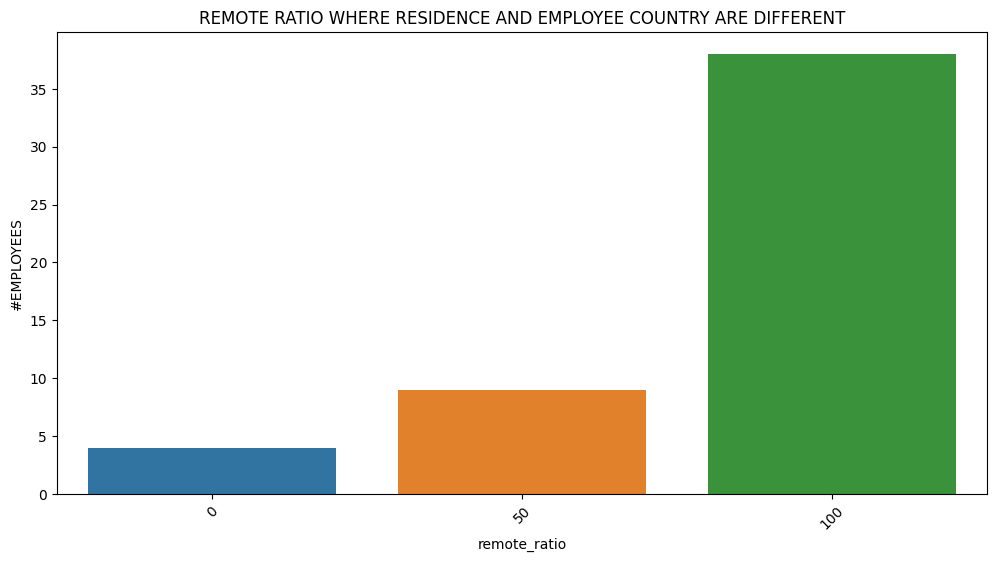

In [26]:
#distribution of remore ratio where 'employee_residence' and 'company_location' are different

df8_2 = pd.DataFrame(df8['remote_ratio'].value_counts()).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='count', data=df8_2)
plt.xticks(rotation=45)
plt.title("REMOTE RATIO WHERE RESIDENCE AND EMPLOYEE COUNTRY ARE DIFFERENT")
plt.ylabel('#EMPLOYEES')
plt.show()

#### INFERENCE:
>As expected, most employess have either 100% or 50% remote under this category.

### Exploring 'employee_residence' vs 'company_location'

In [27]:
#exploring where'employee_residence' and 'company_location' are different

chck2=df[['employee_residence','company_location']]
chck2_1=chck2[chck2['employee_residence'] != chck2['company_location']].reset_index().drop('index',axis=1)
print(f"Threre are {chck2_1.shape[0]} obseravations where 'employee_residence' and 'company_location' are different, which can either mean remote work or immigration.")
chck2_1.head(10)

Threre are 51 obseravations where 'employee_residence' and 'company_location' are different, which can either mean remote work or immigration


,employee_residence,company_location
0,PL,GB
1,PT,US
2,GR,US
3,PH,US
4,PK,DE
5,RU,US
6,ES,US
7,FR,LU
8,IN,US
9,GB,CA


In [28]:
chck2_2=chck2_1.drop_duplicates(subset=['employee_residence','company_location'],keep = 'last')
print(f"There are {chck2_2.shape[0]} unquie combinations of 'employee_residence' & 'company_location'.")

There are 44 unquie combinations of 'employee_residence' & 'company_location'.


In [30]:
chck2_3=pd.DataFrame(chck2_2.groupby(['company_location'])['employee_residence'].apply(','.join).reset_index())
print(f"List of countries having companies that hire internationally: \n \n {chck2_3}")

List of countries having companies that hire internationally: 
 
    company_location                                 employee_residence
0                AS                                                 IN
1                AT                                                 DE
2                CA                                              GB,US
3                CH                                                 IN
4                CN                                                 JE
5                CZ                                                 TN
6                DE                                        RS,NL,FR,PK
7                DK                                                 GR
8                ES                                                 FR
9                FR                                                 US
10               GB                                        PL,VN,RO,HK
11               IL                                                 SG
12         

In [31]:
chck2_4=chck2_3[chck2_3['employee_residence'].str.contains(',')].reset_index().drop('index',axis=1)
print(f"List of countries having companies that hire at more than one international location: \n \n {chck2_4}")

List of countries having companies that hire at more than one international location: 
 
   company_location                                 employee_residence
0               CA                                              GB,US
1               DE                                        RS,NL,FR,PK
2               GB                                        PL,VN,RO,HK
3               LU                                              FR,PT
4               US  PT,GR,PH,ES,BG,DE,HU,PK,VN,RO,FR,IT,PR,CA,MY,B...


###### INFERENCE:
>There are 5 'company_location' which hires internationally at multiple locations. US tops the list with hires most number of countries internationally.

In [32]:
#Checking for international 'employee_residence' where 'company_location' is US
chck2_US = chck2_2[chck2_2['company_location']=='US']
print(f"{len(chck2_US[['employee_residence']].values.tolist())} countries of 'employee_residence' where 'company_location' is US: \n\n{chck2_US[['employee_residence']].values.tolist()}")

19 countries of 'employee_residence' where 'company_location' is US: 

[['PT'], ['GR'], ['PH'], ['ES'], ['BG'], ['DE'], ['HU'], ['PK'], ['VN'], ['RO'], ['FR'], ['IT'], ['PR'], ['CA'], ['MY'], ['BR'], ['BO'], ['RU'], ['IN']]


###### INFERENCE:
>US companies have employees in 19 international locations.

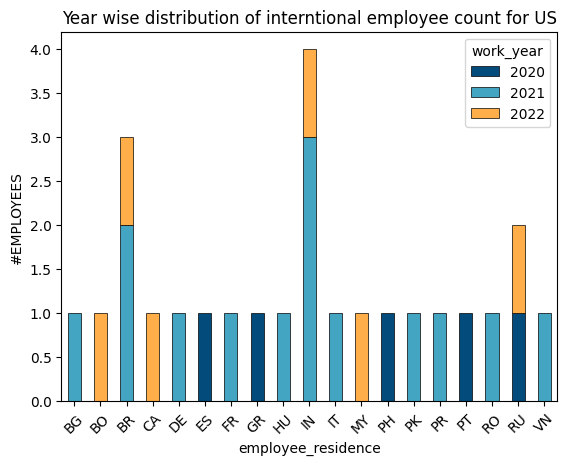

In [33]:
#checking the distribution of US employees with international residence by year
df5=df[(df['company_location']=='US') & (df['employee_residence']!='US')][['company_location','employee_residence','work_year']]
s = (df5.pivot_table(index= 'employee_residence', columns='work_year', values= 'employee_residence', aggfunc='count'))
s.plot(kind='bar',ylabel= '#EMPLOYEES',title="Year wise distribution of interntional employee count for US",color = ["#024b7a","#44a5c2","#ffae49"],xlim=[0,100],
       edgecolor = "black", linewidth = 0.5,stacked=True)
plt.xticks(rotation=45)
plt.show()

#### INFERENCE:
> US companies have most number of employees in IN, BR and RU.

In [45]:
#top 5 countries that provide most number of employment - year wise
df6 = pd.DataFrame(df.groupby(['company_location'])['experience_level'].count()).reset_index()
df6 = df6.rename(columns={'experience_level': 'count'})
df6_1=df6.sort_values(by=['count'],ascending = False).head(5)
print(f"Top 5 countries that provide most number of employment: \n{df6_1.reset_index().drop('index',axis=1)}")

Top 5 countries that provide most number of employment: 
  company_location  count
0               US    355
1               GB     47
2               CA     30
3               DE     28
4               IN     24


work_year         2020  2021  2022
company_location                  
CA                   1    11    18
DE                   7    16     5
GB                   4    14    29
IN                   4    16     4
US                  30    99   226


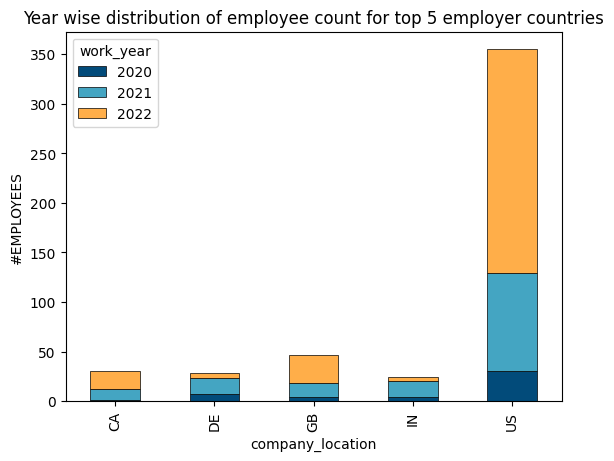

In [73]:
#Checking year wise distribution of top 5 employers
lst=df6_1[['company_location']].values.tolist()
new_lst = list(np.concatenate(lst))
df6_2=df[df['company_location'].isin(new_lst)]
s = (df6_2.pivot_table(index= 'company_location' , columns='work_year', values= 'employee_residence', aggfunc='count'))
print(s)
s.plot(kind='bar',ylabel= '#EMPLOYEES',title="Year wise distribution of employee count for top 5 employer countries",color = ["#024b7a","#44a5c2","#ffae49"],
       edgecolor = "black", linewidth = 0.5,stacked=True)
plt.show()

#### INFERENCE:
>The above plot clearly shows that *US* has the most number of international hires over the years. While #employees have increased for CA,GB and US in 2022 as compared to 2020, this is not true for *DE* and *IN*.

### EXPLORING REMOTE RATIO

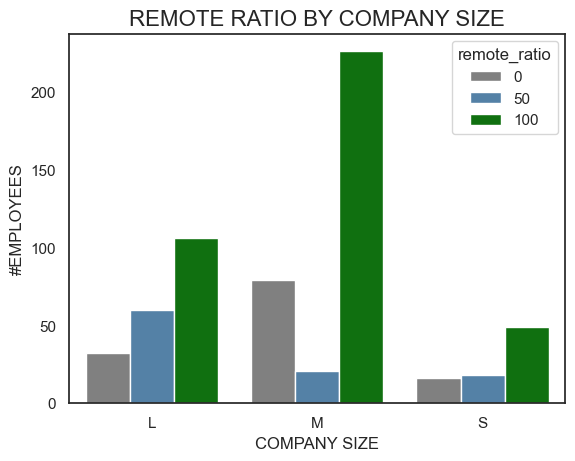

In [90]:
#company size and remote ratio stacked
s = (df.pivot_table(index= ['company_size','remote_ratio'], values= 'employee_residence', aggfunc='count')).reset_index()
sns.set(style='white')
#create grouped bar chart
sns.barplot(x='company_size', y='employee_residence', hue='remote_ratio', data=s, palette=['grey', 'steelblue','green']) 
#add overall title
plt.title('REMOTE RATIO BY COMPANY SIZE', fontsize=16)

#add axis titles
plt.xlabel('COMPANY SIZE')
plt.ylabel('#EMPLOYEES')

plt.show()

In [91]:
df['company_size'].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

#### INFERENCE:
> From the above plot we see that mid size companies have the most nuber of employee with 100% remote facilities. However, the dataset is baised towards mid sized companies, So we must compare the proportion in order to get a true picture 

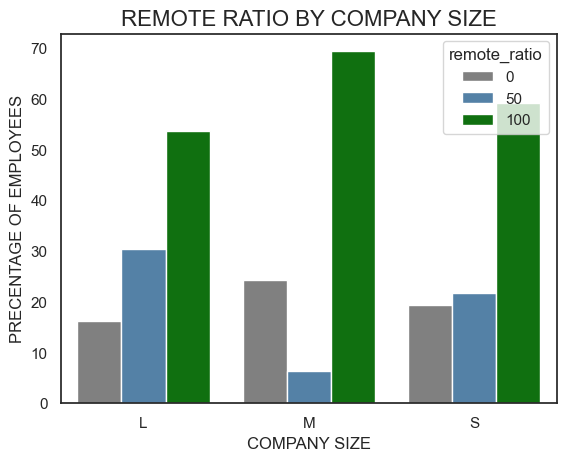

In [110]:
s = (df.pivot_table(index= ['company_size','remote_ratio'], values= 'employee_residence', aggfunc='count')).reset_index()
t= pd.DataFrame(df['company_size'].value_counts()).reset_index()
f=s.merge(t, how='left', on='company_size')
f["Proportion"] = (f["employee_residence"]/f["count"])*100
f
sns.set(style='white')
#create grouped bar chart
sns.barplot(x='company_size', y='Proportion', hue='remote_ratio', data=f, palette=['grey', 'steelblue','green']) 
#add overall title
plt.title('REMOTE RATIO BY COMPANY SIZE', fontsize=16)

#add axis titles
plt.xlabel('COMPANY SIZE')
plt.ylabel('PRECENTAGE OF EMPLOYEES')

plt.show()

#### INFERENCE:
>Even by proportion, Mid size companies provided 100% remote work to most of their employees, followed by small and large ones respectively. However, large companies lead in providing "hybrid" mode of working.

#### HEATMAPS

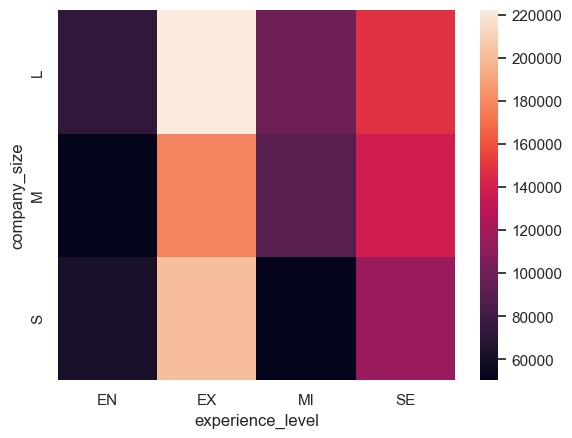

In [155]:
#correlation between company size,experience level and salary

data = (df.pivot_table(index= 'company_size', columns='experience_level', values= 'salary_in_usd', aggfunc='mean'))
sns.heatmap(data)
plt.show()
#data

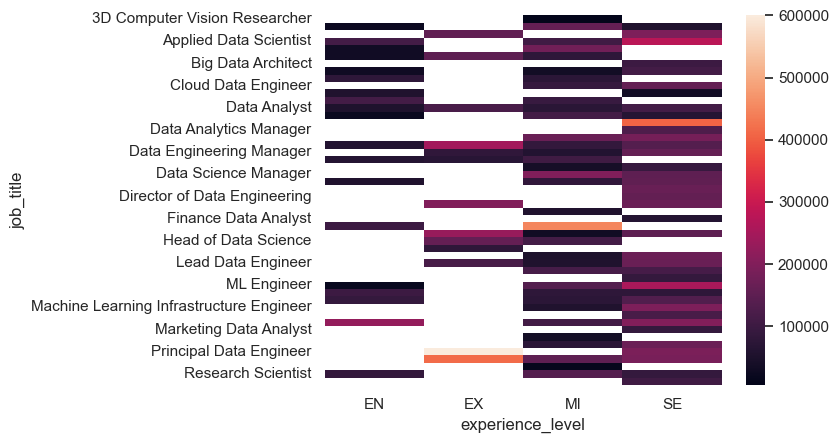

In [156]:
#correlation between job title,experience level and salary

data = (df.pivot_table(index= 'job_title', columns= 'experience_level', values= 'salary_in_usd', aggfunc='mean'))
sns.heatmap(data)
plt.show()


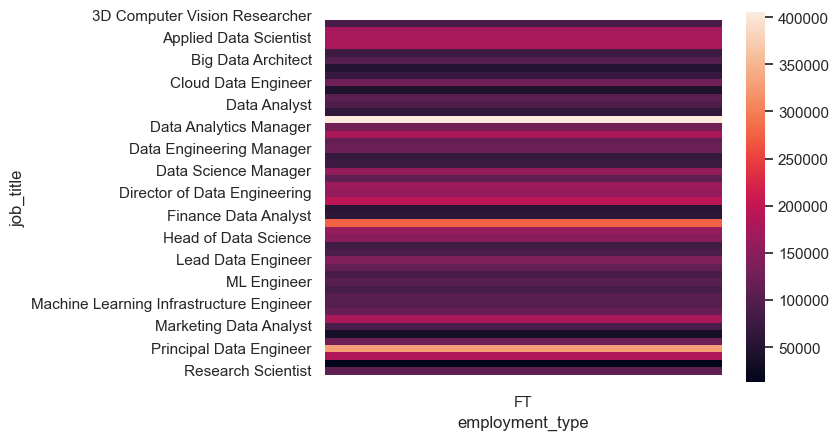

In [157]:
#correlation between job title and salary for Full time employees

data = (df.pivot_table(index= 'job_title', columns= 'employment_type', values= 'salary_in_usd', aggfunc='mean'))
data.drop(["CT","FL","PT"],axis=1,inplace=True)
sns.heatmap(data)
plt.show()


### TOP 10 HIGHEST PAYING JOBS

In [154]:
#top 10 highest paying jobs
data = (df.pivot_table(index= 'job_title',values= 'salary_in_usd', aggfunc='mean'))
data.sort_values(by='salary_in_usd', ascending=False,inplace=True)
print(data.head(10))

                          salary_in_usd
job_title                              
Data Analytics Lead       405000.000000
Principal Data Engineer   328333.333333
Financial Data Analyst    275000.000000
Principal Data Scientist  215242.428571
Director of Data Science  195074.000000
Data Architect            177873.909091
Applied Data Scientist    175655.000000
Analytics Engineer        175000.000000
Data Specialist           165000.000000
Head of Data              160162.600000


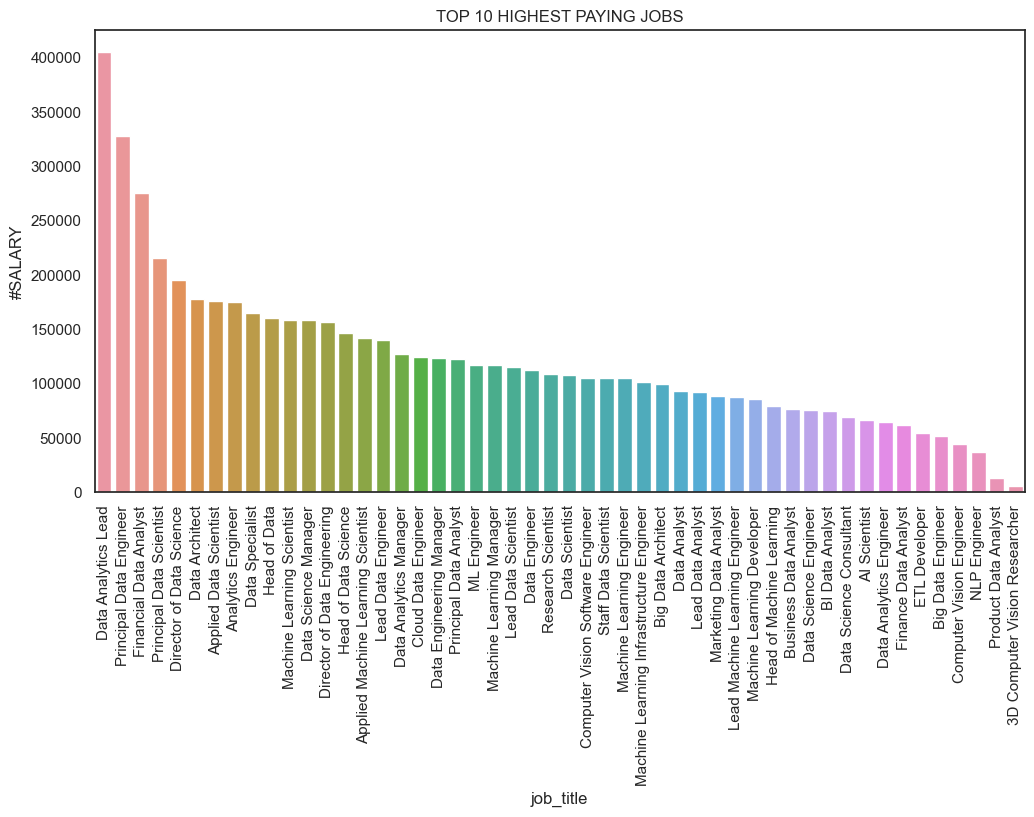

In [150]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=data)
plt.xticks(rotation=90)
plt.title("TOP 10 HIGHEST PAYING JOBS")
plt.ylabel('#SALARY')
plt.show()